In [1]:
import numpy as np 
from matplotlib import pyplot as plt 

import random

import pandas as pd 
import os 
from tqdm import tqdm 

import cv2 
from PIL import Image

# import tensorflow as tf 

train_depth_left = "Datasets/stereo/data_scene_flow/training/disp_occ_0"
train_depth_right = "Datasets/stereo/data_scene_flow/training/disp_occ_1"
train_img_left = "Datasets/stereo/data_scene_flow/training/image_2"
train_img_right = "Datasets/stereo/data_scene_flow/training/image_3"

test_img_left = "Datasets/stereo/data_scene_flow/testing/image_2"
test_img_right = "Datasets/stereo/data_scene_flow/testing/image_3"

train_paths = [train_depth_left, train_depth_right, train_img_left, train_img_right]
test_paths = [None, None, test_img_left, test_img_right]

In [2]:
class DataLoader:

    def __init__(self, data_paths, shuffle = True, batch_size = 32, type="training", test_split = 0.2):
        self.depth_left, self.depth_right, self.img_left, self.img_right = data_paths  
        self.shuffle = shuffle 
        self.batch_size = batch_size 
        self.type = "training" 
        self.test_split = 0.2 
        self.data = {
            "depth_left": [], 
            "depth_right": [], 
            "img_left": [], 
            "img_right": [] 
        }
        self.img_paths = os.list_dir(self.img_right)
        self.data_size = len(self.img_paths)

    def load_paths(self):

        if self.type == "training": 
            self.data["img_left"] = [os.path.join(self.img_left, i) for i in tqdm(self.img_paths, desc="Loading Stereo Left Training Images", ncols=100)]
            self.data["depth_left"] = [os.path.join(self.depth_left, i) for i in tqdm(self.img_paths, desc="Loading Stereo Left Training Depths", ncols=100)] 
            self.data["img_left"] = [os.path.join(self.img_right, i) for i in tqdm(self.img_paths, desc="Loading Stereo Right Training Images", ncols=100)]
            self.data["depth_right"] = [os.path.join(self.depth_right, i) for i in tqdm(self.img_paths, desc="Loading Stereo Right Training Depths", ncols=100)]  

        else:
            self.data["img_left"] = [os.path.join(self.img_left, i) for i in tqdm(self.img_paths, desc="Loading Stereo Left Test Images", ncols=100)]
            self.data["img_right"] = [os.path.join(self.img_right, i) for i in tqdm(self.img_paths, desc="Loading Stereo Right Test Images", ncols=100)]

    # def getBatch(self, type="training"):

SyntaxError: unexpected EOF while parsing (1557796648.py, line 31)

In [6]:
import random
100 in random.sample(range(0, 100), 100)


False

In [33]:
left = os.listdir(train_depth_left)
right = os.listdir(train_depth_right)

In [37]:
i1 = plt.imread(train_depth_left + "/" + left[1])
i2 = plt.imread(train_depth_right + "/" + right[1])

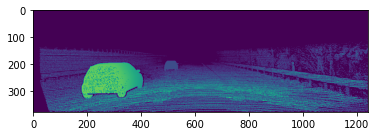

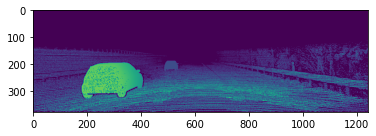

In [38]:
plt.imshow(i1)
plt.show()
plt.imshow(i2)
plt.show()

In [12]:
## Change this 
def depth_read(filename):
    # loads depth map D from png file
    # and returns it as a numpy array,
    # for details see readme.txt

    depth_png = np.array(Image.open(filename), dtype=np.uint16)
    # make sure we have a proper 16bit depth map here.. not 8bit!
    assert(np.max(depth_png) > 255)

    depth = depth_png / 255.
    depth[depth_png == 0] = -1.
    return depth


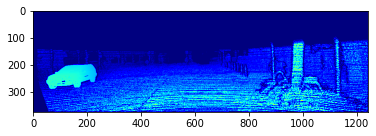

In [21]:
img_path = "Datasets/stereo/data_scene_flow/training/disp_noc_0/000001_10.png"

img = depth_read(img_path)
plt.imshow(img, plt.cm.jet)
plt.show()

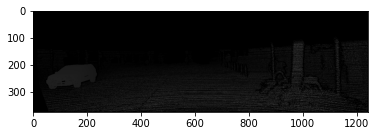

In [22]:
img = cv2.imread(img_path)
plt.imshow(img, cmap=plt.cm.jet)
plt.show()

In [16]:
img.shape

(375, 1242, 3)

In [19]:
def normalize(img_path):
    img = cv2.imread(img_path)
    return img + (255 - img.max())
    

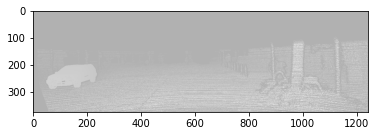

In [20]:
plt.imshow(normalize(img_path))